In [4]:
# import data
import pandas as pd

data = pd.read_csv("./6dB/df_6dB_valve_fe_ta_imb.csv")
data
#clean data
Target = data['target']
indexs = data['Unnamed: 0']
data.drop(['target', 'Unnamed: 0'], axis=1, inplace=True)
data = data.drop(data.iloc[:,13:], axis=1)
data


,mfccs0,mfccs1,mfccs2,mfccs3,mfccs4,mfccs5,mfccs6,mfccs7,mfccs8,mfccs9,mfccs10,mfccs11,mfccs12
0,-512.26380,171.89650,-36.997234,61.159070,-29.188457,47.690310,-19.822397,21.088257,-9.002375,8.224021,2.897726,-8.941576,5.969934
1,-469.91430,163.77786,-59.444805,68.757290,-43.909313,44.682420,-25.089130,17.827192,-9.302142,9.294248,0.053100,-7.799642,9.213895
2,-493.85104,163.50308,-46.888340,48.851200,-44.472176,44.614006,-31.131735,22.592953,-15.453775,4.875377,4.212093,3.800951,16.534592
3,-490.23510,176.44164,-50.314450,62.407856,-32.379230,41.144150,-20.342564,15.855983,-10.569577,3.924163,3.268405,-6.863183,6.434731
4,-528.30720,176.72162,-27.095566,50.882950,-23.018460,42.340630,-14.727908,19.486193,-7.398966,6.597590,3.085620,-7.554741,5.500842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,-505.98047,159.32208,-24.519772,43.337246,-18.006474,41.993800,-6.248128,20.245960,-9.728022,0.765937,3.556942,1.834334,1.836890
4166,-496.07250,157.39015,-29.783648,44.543453,-22.744200,46.494980,-2.518814,16.453236,-10.405822,2.058645,4.638932,4.892388,6.181634
4167,-499.93430,150.21715,-25.302015,37.087460,-30.909477,45.899880,-14.023315,20.189610,-11.108635,2.306639,6.256020,8.992784,13.571177
4168,-489.90347,165.15494,-28.538603,48.138668,-17.237879,37.098530,-11.673386,10.490759,-10.591024,2.876475,5.271651,-0.706384,2.035042


In [5]:
# #EDA
import seaborn as sns
# df1=df.iloc[:,0:4]
# sns.pairplot(df1)



In [6]:
import matplotlib.pyplot as plt
# fig=plt.figure(figsize=(10,10))
# plt.scatter(df['mfccs0'], df['mfccs2'], s=2)
# plt.title(" Mffcs metrics")
# plt.xlabel("mfccs 0")
# plt.ylabel("mfccs 2")

In [9]:
from sklearn.cluster import KMeans

# number of Pokémon clusters
team_size = 2


data_normalized=(data-data.mean())/data.std()
data_normalized = data_normalized.add_suffix('_zscore')

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(data_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
Index = range(data_normalized.shape[0])
data_normalized['Index'] = Index
data_normalized['Target'] = Target

cluster_labels = pd.Series(kmeans.labels_, name='cluster')
data_normalized = data_normalized.join(cluster_labels.to_frame())

# datax = data_normalized.join(cluster_labels.to_frame()).join(indexs.to_frame())
data_normalized.shape

(4170, 16)

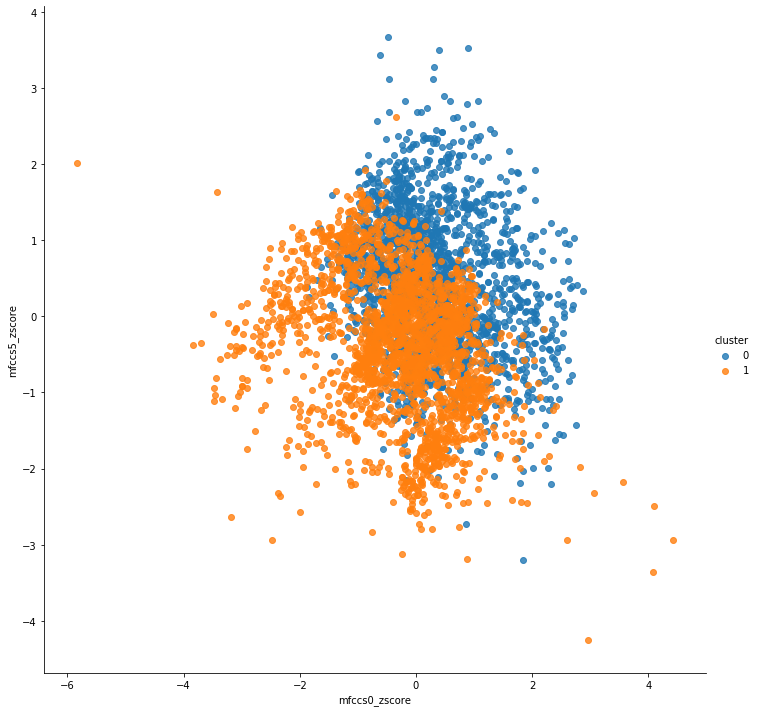

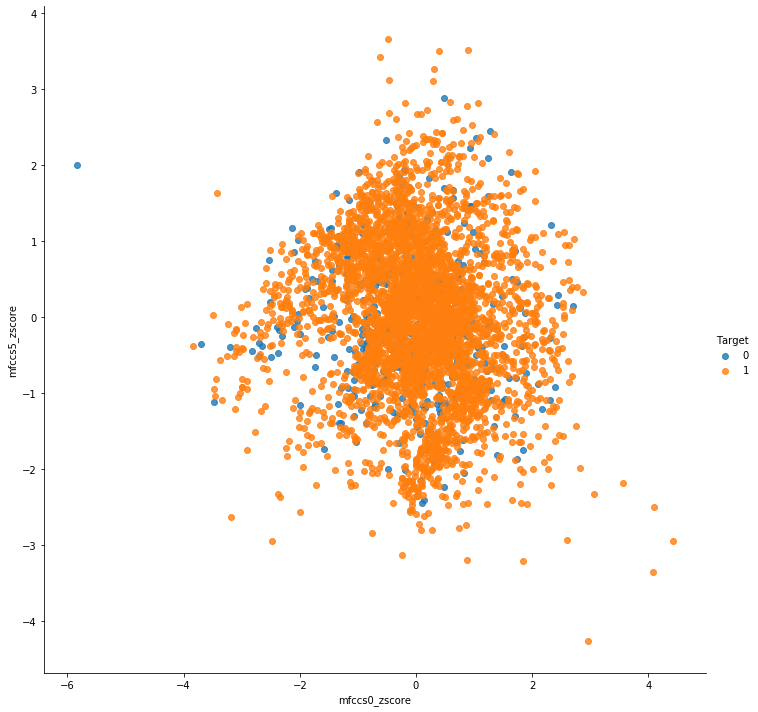

In [14]:
# sns.lmplot(x='Unnamed: 0', y='mfccs5',  height=10, data=data,
#            fit_reg=False, hue='cluster')
# for i in list(data_normalized):
    # sns.lmplot(x='Index', y=f'mfccs{i}_zscore',  height=10, data=data_normalized,
    # sns.lmplot(x='Index', y=f'{i}',  height=10, data=data_normalized,
sns.lmplot(x='mfccs0_zscore', y='mfccs5_zscore',  height=10, data=data_normalized,
           fit_reg=False, hue='cluster')
sns.lmplot(x='mfccs0_zscore', y='mfccs5_zscore',  height=10, data=data_normalized,
           fit_reg=False, hue='Target')

In [ ]:
Index = range(data_normalized.shape[0])
data_normalized['Index'] = Index
data_normalized
# Now separate the data
# A = Z[cluster_labels.ravel()==0]
# B = Z[cluster_labels.ravel()==1]
# B = Z[cluster_labels.ravel()==2]
# A['Unnamed: 0'].shape 
# fig=plt.figure(figsize=(10,10))
# plt.plot(A['Unnamed: 0'])#, df['mfccs2'], s=2)



# sns.lmplot(x='Unnamed: 0', y='mfccs1_zscore',  height=10, data=A,
#            fit_reg=False, hue='cluster')

# # Plot the data
# plt.scatter(A[:,0],A[:,1])
# plt.scatter(B[:,0],B[:,1],c = 'r')
# plt.scatter(cluster_center[:,0],cluster_center[:,1],s = 80,c = 'y', marker = 's')
# plt.xlabel('Test Data'),plt.ylabel('Z samples')
# plt.show()